### Installation

This cell installs the necessary libraries from the `requirements.txt` file. This ensures that all dependencies required for the notebook to run correctly are installed in the Colab environment.

**Explanation:**
- `!pip install -r requirements.txt`: This command executes the `pip install` command in the Colab environment's shell. The `-r` flag indicates that the packages to be installed are listed in the specified file, `requirements.txt`. Colab will then download and install all libraries listed in that file.

In [49]:
!pip install -r requirements.txt

### API Key and URL Setup

This cell imports the `litellm` and `openai` libraries, as well as `userdata` from `google.colab` to securely access secrets stored in the Colab environment. It then retrieves the `LITELLM_API_KEY`, `LITELLM_URL`, and `MODEL` from Colab's user data secrets, assigning them to variables for later use.

**Explanation:**
- `import litellm`: Imports the LiteLLM library, which provides a unified interface for various language models.
- `from openai import OpenAI`: Imports the `OpenAI` class from the `openai` library. This is used to interact with models, even if they are served through LiteLLM, by mimicking the OpenAI API.
- `from google.colab import userdata`: Imports the `userdata` module from `google.colab`, which allows secure access to secrets stored in the Colab environment.
- `LITELLM_API_KEY = userdata.get('LITELLM_API_KEY')`: Retrieves the value of the secret named `LITELLM_API_KEY` from Colab's user data and assigns it to the variable `LITELLM_API_KEY`.
- `LITELLM_URL = userdata.get('LITELLM_URL')`: Retrieves the value of the secret named `LITELLM_URL` and assigns it to the variable `LITELLM_URL`. This is the base URL of your LiteLLM proxy.
- `MODEL = userdata.get('LITELLM_MODEL')`: Retrieves the value of the secret named `LITELLM_MODEL` and assigns it to the variable `MODEL`. This is the name of the specific model you want to use through LiteLLM.

**Guidance:**
- Ensure you have added your LiteLLM API key, LiteLLM URL, and the model name you are using as secrets in Colab's user data. You can access the secrets manager by clicking the "🔑" icon in the left sidebar.

In [50]:
import litellm
from openai import OpenAI
from google.colab import userdata

LITELLM_API_KEY = userdata.get('LITELLM_API_KEY')
LITELLM_URL = userdata.get('LITELLM_URL')
MODEL = userdata.get('LITELLM_MODEL')

### Initialize OpenAI Client

This cell initializes an `OpenAI` client instance. It uses the `LITELLM_URL` as the `base_url` to point to the LiteLLM proxy and the `LITELLM_API_KEY` for authentication. This client will be used to interact with the language model through the LiteLLM proxy.

**Explanation:**
- `client = OpenAI(...)`: Creates an instance of the `OpenAI` client.
- `base_url=LITELLM_URL`: Sets the base URL for the API requests to the LiteLLM proxy URL retrieved from secrets.
- `api_key=LITELLM_API_KEY`: Provides the API key for authentication with the LiteLLM proxy, also retrieved from secrets.

**Guidance:**
- This client is configured to communicate with your LiteLLM instance, which in turn routes requests to the actual language model.

In [51]:
# Initialize client with your proxy URL
client = OpenAI(
    base_url=LITELLM_URL,  # Your proxy URL
    api_key=LITELLM_API_KEY             # Your proxy API key
)

### Generate Non-Streaming Response

This cell demonstrates how to generate a non-streaming response from the language model using the initialized `client`. It sends a prompt asking for a two-sentence bedtime story about a unicorn and stores the entire response in the `response` variable.

In [52]:
# non streaming response
response = client.responses.create(
    model=MODEL,
    input="Tell me a two sentence bedtime story about a unicorn.",
)

In [53]:
response.output[0].content[0].text

'Luna the unicorn pranced through the moonlit meadow, her silver horn glowing softly as she sprinkled stardust over the sleeping forest animals to give them sweet dreams. As the first light of dawn approached, she curled up beneath her favorite willow tree and drifted off to sleep, dreaming of rainbows and cotton candy clouds.'

### Display Non-Streaming Response

This cell displays the complete `response` object obtained from the previous non-streaming call. This allows you to see the full structure of the response, including metadata, usage information, and the generated content.

In [54]:
response

Response(id='resp_bGl0ZWxsbTpjdXN0b21fbGxtX3Byb3ZpZGVyOmJlZHJvY2s7bW9kZWxfaWQ6ZTJhZmM1ODQ4MGMzYTAxZWJmNjI4ZWIxYzgyM2I0M2Y5ODY1ZDY1NDU0ZjZhN2U5ZTNkNzhlMTVmY2ZhNjEyZDtyZXNwb25zZV9pZDpjaGF0Y21wbC0zMTg3MDY1Zi01NmU4LTRhZjAtYTA3My02ZWYzZmEwMjY1MjQ=', created_at=1757673304.0, error=None, incomplete_details=None, instructions=None, metadata={}, model='us.anthropic.claude-sonnet-4-20250514-v1:0', object='chat.completion', output=[ResponseOutputMessage(id='chatcmpl-3187065f-56e8-4af0-a073-6ef3fa026524', content=[ResponseOutputText(annotations=[], text='Luna the unicorn pranced through the moonlit meadow, her silver horn glowing softly as she sprinkled stardust over the sleeping forest animals to give them sweet dreams. As the first light of dawn approached, she curled up beneath her favorite willow tree and drifted off to sleep, dreaming of rainbows and cotton candy clouds.', type='output_text', logprobs=None)], role='assistant', status='stop', type='message')], parallel_tool_calls=False, temper

### Generate Streaming Response

This cell is similar to the non-streaming example but configures the client for streaming responses. It sends the same prompt and prints the response as it is generated, which can be useful for larger outputs or interactive applications.

In [55]:
# Streaming response
response = client.responses.create(
    model=MODEL,
    input="Tell me a four sentence bedtime poem about a unicorn from klang valley.",
    stream=True,
)

full_text = []

for event in response:
    # Check if the event is a text delta
    if event.type == "response.output_text.delta":
        chunk = event.delta
        print(chunk, end="", flush=True)   # stream piece by piece
        full_text.append(chunk)
    elif event.type == "response.completed":
        print("\n\n[sstreameeerrrrred successfully!!!]")
    elif event.type == "response.error":
        print(f"\n[error] {event.error}")

final_text = "".join(full_text)
print("\nFinal text:", final_text)


Here's a gentle bedtime poem about a unicorn from Klang Valley:

In Klang Valley where the city lights gleam bright,
A gentle unicorn roams through the peaceful night.
With silver horn that sparkles like the stars above,
She spreads sweet dreams and fills hearts with love.

[sstreameeerrrrred successfully!!!]

Final text: Here's a gentle bedtime poem about a unicorn from Klang Valley:

In Klang Valley where the city lights gleam bright,
A gentle unicorn roams through the peaceful night.
With silver horn that sparkles like the stars above,
She spreads sweet dreams and fills hearts with love.


### Import Langgraph Components

This cell imports necessary components from the `langgraph` library, specifically `create_react_agent` for building reactive agents. It also imports `OpenAI` and `load_dotenv` (although `load_dotenv` is not strictly necessary when using Colab secrets) and `ChatLiteLLM` from `langchain_litellm` for integrating LiteLLM with Langchain, and `InMemorySaver` for managing conversation history.

In [56]:
from langgraph.prebuilt import create_react_agent
import os
from openai import OpenAI
from dotenv import load_dotenv
from langchain_litellm import ChatLiteLLM
from langgraph.checkpoint.memory import InMemorySaver

### Define Langchain Model with LiteLLM

This cell defines the language model to be used within the Langchain framework, leveraging the LiteLLM integration. It initializes `ChatLiteLLM` with the previously retrieved `MODEL`, `LITELLM_URL`, and `LITELLM_API_KEY`. It also sets `custom_llm_provider` to "openai" to ensure compatibility with Langchain's OpenAI integration, enables streaming, and sets the temperature to 0 for deterministic output.

In [57]:
# 1. Define the model
model = ChatLiteLLM(
    model=MODEL, # configured in LiteLLM
    api_base=LITELLM_URL, # URL to the LiteLLM server
    api_key=LITELLM_API_KEY, # API key for LiteLLM
    # organization=os.getenv("ORG"), # organization configured in LiteLLM
    custom_llm_provider="openai", # mimic OpenAI API
    temperature=0.0, # temperature for the model
    streaming=True, # enable streaming
    verbose=True, # enable verbose logging
)

### Define Checkpointer and Tool

This cell sets up an `InMemorySaver` as a checkpointer to store the conversation history in memory. It also defines a simple Python function `get_weather` that acts as a tool for the agent. This tool takes a city name as input and returns a hardcoded string indicating sunny weather. In a real application, this would typically involve calling an external weather API.

In [58]:
checkpointer = InMemorySaver()

def get_weather(city: str) -> str:
    """Get weather for a given city."""
    print(f"Getting weather for city: {city}")
    return f"It's always sunny in {city}!"

def scan_port(host: str, port: int) -> str:
    """Dummy port scanner."""
    print(f"Scanning port {port} on host {host}")
    return f"Port {port} on {host} appears secure."

def lookup_cve(cve_id: str) -> str:
    """Dummy CVE lookup."""
    print(f"Looking up {cve_id}")
    return f"{cve_id} has no known vulnerabilities."


### Create React Agent

This cell creates a "React" agent using `create_react_agent`. This agent is designed to react to user input and decide whether to use an available tool (like the `get_weather`, `scan_port`, or `lookup_cve` functions) or directly respond. It's initialized with the `model`, the list of available `tools`, a system `prompt`, and the `checkpointer` for managing conversation state.

**Explanation:**
- `agent = create_react_agent(...)`: Creates an instance of a React agent.
- `model=model`: Specifies the language model (`ChatLiteLLM` instance) that the agent will use for reasoning and generating responses.
- `tools=[scan_port, lookup_cve, get_weather]`: Provides a list of the available tools that the agent can call.
- `prompt="You are a security research assistant. Use the tools to investigate potential vulnerabilities."`: Sets the system prompt for the agent, guiding its behavior and role.
- `checkpointer=checkpointer`: Associates the `InMemorySaver` checkpointer with the agent to manage conversation history.

**Guidance:**
- The React agent uses the language model to determine the best course of action based on the user's input and the available tools. It can decide to call a tool or respond directly.

In [59]:
agent = create_react_agent(
    model=model,
    tools=[scan_port, lookup_cve, get_weather],
    prompt="You are a security research assistant. Use the tools to investigate potential vulnerabilities.",
    checkpointer=checkpointer
)


### Define and use Thread ID

This cell defines a dictionary `thread_id` that will be used to identify a specific conversation thread. This is important for the checkpointer to store and retrieve the correct conversation history.

In [60]:
thread_id = {"configurable": {"thread_id": "thread-1"}}

In [62]:
response = agent.invoke(
    {"messages": [{"role": "user", "content": "hi! i am from kuala lumpur"}]},
    {"configurable": {"thread_id": "1"}},
)

In [63]:
response = agent.invoke(
    {"messages": [{"role": "user", "content": "What is the weather in my city?"}]},
    {"configurable": {"thread_id": "1"}},
)

Getting weather for city: Kuala Lumpur


In [67]:
response['messages'][-1].content

'The weather in Kuala Lumpur is showing as sunny! Though I should mention this appears to be a simplified weather response. For more detailed and current weather information, you might want to check a dedicated weather service or app.\n\nIs there anything security-related I can help you with today?'

### Invoke Agent to Scan Port


In [61]:
response = agent.invoke(
    {"messages": [{"role": "user", "content": "Scan port 80 on example.com"}]},
    {"configurable": {"thread_id": "1"}},
)


Scanning port 80 on host example.com


### Print Port Scan Result


In [23]:
print("Port scan result -> ", response["messages"][-1].content)


Port scan result ->  The port scan results show that port 80 on example.com appears secure. This indicates that the HTTP service on the standard web port is running and doesn't show any obvious vulnerabilities from this basic scan.


### Invoke Agent to Lookup CVE


In [24]:
response = agent.invoke(
    {"messages": [{"role": "user", "content": "Look up CVE-2024-1234"}]},
    {"configurable": {"thread_id": "1"}},
)


Looking up CVE-2024-1234


### Print CVE Lookup Result


In [25]:
print("CVE lookup result -> ", response["messages"][-1].content)


CVE lookup result ->  The CVE lookup for CVE-2024-1234 indicates that there are no known vulnerabilities associated with this identifier. This could mean either:

1. The CVE ID doesn't exist in the database
2. It's a placeholder/example CVE ID
3. The vulnerability hasn't been documented yet

If you're looking for information about a specific vulnerability, please double-check the CVE identifier or provide more details about the security issue you're investigating.


In [30]:
from langchain_core.messages import AnyMessage
from typing_extensions import TypedDict

class State(TypedDict):
    messages: list[AnyMessage]
    extra_field: int

In [31]:
from langchain_core.messages import AIMessage

def node(state: State):
    messages = state["messages"]
    new_message = AIMessage("Hello!")
    return {"messages": messages + [new_message], "extra_field": 10}

In [32]:
from langgraph.graph import StateGraph

builder = StateGraph(State)
builder.add_node(node)
builder.set_entry_point("node")
graph = builder.compile()

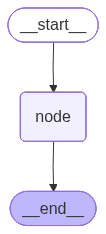

In [44]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

#Advanced Security Agent with Mock Tools

### Import Libraries and Define Helpers

This cell imports necessary libraries for the advanced security agent, including modules for regular expressions (`re`), IP address manipulation (`ipaddress`), date and time handling (`datetime`), CSV processing (`csv`), JSON handling (`json`), and UUID generation (`uuid`). It also defines helper functions for classifying Indicators of Compromise (IOCs), getting the current time in ISO format, and calculating the number of days between two dates. Policy lists (allowlist and blocklist) are initialized, and a helper to load these lists from files is defined.

**Explanation:**
- `import os, re, ipaddress, datetime, csv, json, uuid`: Imports various standard Python libraries.
- `from typing import List, Dict, Any, Optional, Iterable`: Imports type hints for better code readability and maintainability.
- `from dotenv import load_dotenv`: Imported but not strictly necessary due to Colab secrets.
- `from langgraph.prebuilt import create_react_agent`: Imports the function to create the React agent.
- `from langchain_litellm import ChatLiteLLM`: Imports the LiteLLM integration for Langchain.
- `from langchain_core.tools import tool`: Imports the `@tool` decorator to define tools for the agent.
- `from langgraph.config import get_stream_writer`: Imports a function related to streaming output in Langgraph.
- `IOC_REGEX`: A dictionary containing regular expressions for different types of Indicators of Compromise (IP, domain, URL, SHA256).
- `classify_ioc(x: str) -> str`: A helper function that takes a string and uses the `IOC_REGEX` to determine its type (ip, domain, url, sha256, or unknown).
- `now_iso() -> str`: A helper function to get the current UTC time in ISO 8601 format.
- `days_between(d1: str, d2: Optional[str] = None) -> Optional[int]`: Calculates the number of days between two ISO formatted date strings.
- `ALLOWLIST = set()` and `BLOCKLIST = set()`: Initializes empty sets to store allowed and blocklisted indicators.
- `_load_list_from_file(path: str) -> Iterable[str]`: A helper function to load indicators from a file, one per line, ignoring comments and empty lines.
- The code then attempts to load allowlist and blocklist entries from files specified by environment variables (which would not be used in this Colab setup unless those environment variables were set).

**Guidance:**
- These helper functions and data structures provide foundational capabilities for the security agent to process and analyze indicators.
- The `IOC_REGEX` is a simple way to categorize input strings, but real-world IOC classification can be more complex.

In [43]:
import os, re, ipaddress, datetime, csv, json, uuid
from typing import List, Dict, Any, Optional, Iterable

from dotenv import load_dotenv
from langgraph.prebuilt import create_react_agent
from langchain_litellm import ChatLiteLLM
from langchain_core.tools import tool
from langgraph.config import get_stream_writer

In [ ]:
# ── Helpers ───────────────────────────────────────────────────────────────────
IOC_REGEX = {
    "ip": r"\b(?:(?:25[0-5]|2[0-4]\d|[01]?\d?\d)(?:\.(?!$)|$)){4}\b",
    "domain": r"\b(?=.{1,253}\b)(?!-)(?:[a-z0-9-]{1,63}\.)+[a-z]{2,63}\b",
    "url": r"\bhttps?://[^\s<>\"']+\b",
    "sha256": r"\b[a-fA-F0-9]{64}\b",
}

def classify_ioc(x: str) -> str:
    for k, rgx in IOC_REGEX.items():
        if re.search(rgx, x, flags=re.I):
            return k
    return "unknown"

def now_iso() -> str:
    return datetime.datetime.utcnow().replace(microsecond=0).isoformat() + "Z"

def days_between(d1: str, d2: Optional[str] = None) -> Optional[int]:
    try:
        x = datetime.datetime.fromisoformat(d1.replace("Z", ""))
        y = datetime.datetime.fromisoformat((d2 or now_iso()).replace("Z", ""))
        return (y - x).days
    except Exception:
        return None

# ── Policy lists (allowlist/blocklist) ────────────────────────────────────────
ALLOWLIST = set()
BLOCKLIST = set()

def _load_list_from_file(path: str) -> Iterable[str]:
    if not path or not os.path.exists(path):
        return []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            s = line.strip()
            if s and not s.startswith("#"):
                yield s

# Load from env-provided files if you want (optional)
ALLOWLIST.update(_load_list_from_file(os.getenv("IOC_ALLOWLIST_FILE", "")))
BLOCKLIST.update(_load_list_from_file(os.getenv("IOC_BLOCKLIST_FILE", "")))



### Define Security Tools

This cell defines a suite of tools that the advanced security agent can use. These tools are designed to perform actions relevant to security analysis, such as normalizing IOCs, performing WHOIS lookups, getting GeoIP information, checking OTX reputation, submitting URLs to urlscan.io, checking against policy lists, fusing findings into a verdict, and exporting results to CSV and STIX 2.1 formats. Note that many of these tools are implemented as mocks, returning hardcoded or simplified results.

**Explanation:**
- `@tool`: The decorator is used before each function to register it as a tool.
- `normalize_iocs(iocs: List[str]) -> Dict[str, List[str]]`: Cleans, normalizes, and deduplicates a list of input IOC strings, returning them categorized by type.
- `whois_lookup(domain: str) -> Dict[str, Any]`: Performs a mock WHOIS lookup for a given domain.
- `geoip(ip: str) -> Dict[str, Any]`: Performs a mock GeoIP lookup for an IPv4 address, including a bogon check.
- `otx_reputation(ioc: str) -> Dict[str, Any]`: Performs a mock AlienVault OTX reputation check for an IOC.
- `urlscan_submit(url: str) -> Dict[str, Any]`: Submits a URL to urlscan.io (mock implementation), returning mock scan results including malicious signals.
- `policy_check(ioc: str) -> Dict[str, Any]`: Checks an IOC against the hardcoded `ALLOWLIST` and `BLOCKLIST`.
- `MITRE_MAP`: A dictionary mapping malicious signals to MITRE ATT&CK techniques.
- `map_signals_to_mitre(signals: List[str]) -> List[Dict[str, str]]`: Maps a list of signals to corresponding MITRE techniques.
- `verdict_fuser(findings: Dict[str, Any]) -> Dict[str, Any]`: Takes findings from other tools and fuses them into a final verdict with a label (Malicious, Suspicious, Benign), score (0-100), confidence (low, medium, high), evidence, policy flags, and MITRE tags. This uses a simple heuristic for scoring and confidence.
- `export_csv(records: List[Dict[str, Any]], path: str = "triage_results.csv") -> Dict[str, Any]`: Exports a list of triage records to a CSV file.
- `_stix_now()` and `_stix_id(obj_type: str)`: Helper functions for generating STIX 2.1 timestamps and IDs.
- `export_stix2(records: List[Dict[str, Any]], path: str = "triage_results_stix2.json") -> Dict[str, Any]`: Exports a list of triage records to a minimal STIX 2.1 Bundle containing indicator SDOs.
- `batch_from_csv(path: str, column: str = "indicator") -> Dict[str, Any]`: Reads indicators from a specified column in a CSV file.

**Guidance:**
- These tools represent the capabilities of the security agent. In a real-world scenario, these mock implementations would be replaced with actual API calls to security intelligence platforms and tools.
- The `verdict_fuser` demonstrates how to combine information from multiple sources to arrive at a conclusion.

In [46]:
# ── Tools (mocks; swap with real APIs later) ─────────────────────────────────
@tool
def normalize_iocs(iocs: List[str]) -> Dict[str, List[str]]:
    """Clean, normalize, deduplicate input IOCs. Return dict by type."""
    cleaned = [i.strip().strip("[](),;\"'") for i in iocs if i and isinstance(i, str)]
    dedup = sorted(set(cleaned), key=str.lower)
    out: Dict[str, List[str]] = {"ip": [], "domain": [], "url": [], "sha256": [], "unknown": []}
    for item in dedup:
        out[classify_ioc(item)].append(item)
    return out

@tool
def whois_lookup(domain: str) -> Dict[str, Any]:
    """WHOIS for a domain (mock if no API)."""
    if not re.search(IOC_REGEX["domain"], domain, re.I):
        return {"error": "invalid domain"}
    # TODO: replace with real WHOIS API if available
    created = "2025-07-12"
    return {
        "domain": domain,
        "created": created,
        "registrar": "NameCheap",
        "registrant_country": "PA",
        "age_days": days_between(created) or 60,
        "disposable_like": False,
        "source": "mock",
        "ts": now_iso(),
    }

@tool
def geoip(ip: str) -> Dict[str, Any]:
    """GeoIP + bogon check for an IPv4."""
    try:
        obj = ipaddress.ip_address(ip)
        if obj.is_private or obj.is_loopback or obj.is_reserved:
            return {"ip": ip, "bogon": True, "country": None, "asn": None, "ts": now_iso()}
    except Exception:
        return {"error": "invalid ip"}
    # TODO: replace with real GeoIP
    return {"ip": ip, "bogon": False, "country": "US", "asn": 13335, "org": "Cloudflare", "ts": now_iso(), "source": "mock"}

@tool
def otx_reputation(ioc: str) -> Dict[str, Any]:
    """AlienVault OTX reputation (mock if no API)."""
    typ = classify_ioc(ioc)
    api_key = os.getenv("OTX_API_KEY")
    if not api_key:
        score = 70 if typ in ("domain","url") and any(k in ioc.lower() for k in ["login","update","verify","secure"]) else 10
        return {"ioc": ioc, "type": typ, "pulses": score // 35, "score": score, "tags": ["phishing"] if score >= 60 else [], "source": "mock", "ts": now_iso()}
    # TODO: real OTX call
    return {"ioc": ioc, "type": typ, "pulses": 0, "score": 0, "tags": [], "source": "todo", "ts": now_iso()}

@tool
def urlscan_submit(url: str) -> Dict[str, Any]:
    """Submit URL to urlscan.io (mock if no API)."""
    if not re.search(IOC_REGEX["url"], url, re.I):
        return {"error": "invalid url"}
    key = os.getenv("URLSCAN_API_KEY")
    if not key:
        # mock result indicates credential lure on a fresh domain
        return {
            "url": url,
            "scan_id": "mock-scan-123",
            "final_url": "https://secure-login-example.com/",
            "malicious_signals": ["fresh_domain", "credential_bait"],
            "screenshot": None,
            "domain_age_days": 10,
            "task_report_url": "https://urlscan.io/result/mock-scan-123/",
            "source": "mock",
            "ts": now_iso(),
        }
    # TODO: real submission + polling
    return {"url": url, "scan_id": "todo", "final_url": None, "malicious_signals": [], "source": "todo", "ts": now_iso()}

# ── Policy check tool ─────────────────────────────────────────────────────────
@tool
def policy_check(ioc: str) -> Dict[str, Any]:
    """Check IOC against organization allowlist/blocklist."""
    if ioc in BLOCKLIST:
        return {"ioc": ioc, "policy": "blocklisted"}
    if ioc in ALLOWLIST:
        return {"ioc": ioc, "policy": "allowlisted"}
    return {"ioc": ioc, "policy": "none"}

# ── MITRE ATT&CK tagging (simple mapping) ─────────────────────────────────────
MITRE_MAP = {
    "credential_bait": {"technique": "T1566.002", "name": "Phishing: Spearphishing Link"},
    "fresh_domain": {"technique": "T1583.001", "name": "Acquire Infrastructure: Domains"},
    "public_ip_scanning": {"technique": "T1595", "name": "Active Scanning"},
}

def map_signals_to_mitre(signals: List[str]) -> List[Dict[str, str]]:
    out = []
    for s in signals:
        if s in MITRE_MAP:
            out.append(MITRE_MAP[s])
    return out

# ── Verdict fusion with confidence & evidence ─────────────────────────────────
@tool
def verdict_fuser(findings: Dict[str, Any]) -> Dict[str, Any]:
    """
    Fuse tool outputs into a verdict with label, score (0-100), confidence (low/med/high),
    evidence (bullets), policy flags, and MITRE tags when applicable.
    """
    score = 0
    evidence = []
    mitre = []

    # Reputation
    if (otx := findings.get("otx")):
        s = otx.get("score", 0)
        if s >= 70:
            score += 50; evidence.append(f"OTX score {s} (>=70)")
        elif s >= 40:
            score += 25; evidence.append(f"OTX score {s} (>=40)")
        if otx.get("tags"):
            evidence.append(f"OTX tags: {', '.join(otx['tags'])}")

    # Domain age
    if (whois := findings.get("whois")):
        age = whois.get("age_days", 9999)
        if age < 30:
            score += 30; evidence.append(f"Young domain ({age} days)")
        elif age < 90:
            score += 15; evidence.append(f"Newish domain ({age} days)")

    # URLScan signals
    signals = []
    if (us := findings.get("urlscan")):
        signals = us.get("malicious_signals", [])
        if "credential_bait" in signals:
            score += 30; evidence.append("Credential lure detected")
        if "fresh_domain" in signals or (us.get("domain_age_days") is not None and us["domain_age_days"] < 30):
            score += 15; evidence.append(f"Fresh domain via urlscan ({us.get('domain_age_days','?')} days)")
        mitre.extend(map_signals_to_mitre(signals))

    # GeoIP
    if (g := findings.get("geoip")):
        if g.get("bogon"):
            evidence.append("Bogon/internal IP (context dependent)")

    # Policy
    pol = findings.get("policy", {}).get("policy", "none")
    if pol == "blocklisted":
        score = max(score, 90); evidence.append("Organization blocklist match")
    elif pol == "allowlisted":
        # Reduce score significantly but do not force benign
        score = max(0, score - 40); evidence.append("Organization allowlist match")

    # Final label
    label = "Malicious" if score >= 70 else "Suspicious" if score >= 40 else "Benign"

    # Confidence heuristic (based on variety/strength of signals)
    strong_signals = sum(1 for e in evidence if any(k in e.lower() for k in ["otx score", "credential", "blocklist"]))
    confidence = "high" if strong_signals >= 2 else "medium" if strong_signals == 1 else "low"

    return {
        "label": label,
        "score": int(min(score, 100)),
        "confidence": confidence,
        "evidence": evidence,
        "policy": pol,
        "mitre": mitre,  # list of {technique, name}
        "ts": now_iso(),
    }

# ── Exports: CSV and STIX 2.1 ─────────────────────────────────────────────────
@tool
def export_csv(records: List[Dict[str, Any]], path: str = "triage_results.csv") -> Dict[str, Any]:
    """Export triage records to CSV (flat schema)."""
    if not records:
        return {"error": "no records"}
    # Collect union of keys for a flat header
    headers = sorted({k for r in records for k in r.keys() if k not in ("evidence","mitre")})
    headers += ["evidence", "mitre"]
    with open(path, "w", newline="", encoding="utf-8") as f:
        w = csv.DictWriter(f, fieldnames=headers)
        w.writeheader()
        for r in records:
            row = {k: r.get(k) for k in headers}
            # stringify lists
            row["evidence"] = "; ".join(r.get("evidence", []))
            row["mitre"] = "; ".join([m.get("technique","") for m in r.get("mitre", [])])
            w.writerow(row)
    return {"ok": True, "path": os.path.abspath(path)}

def _stix_now() -> str:
    return datetime.datetime.utcnow().replace(microsecond=0).isoformat() + "Z"

def _stix_id(obj_type: str) -> str:
    return f"{obj_type}--{uuid.uuid4()}"

@tool
def export_stix2(records: List[Dict[str, Any]], path: str = "triage_results_stix2.json") -> Dict[str, Any]:
    """
    Export to a minimal STIX 2.1 Bundle of indicator SDOs.
    Each record should include: ioc, type, label/score/confidence/evidence/mitre.
    """
    if not records:
        return {"error": "no records"}
    objs = []
    created = _stix_now()
    for r in records:
        ioc = r.get("ioc")
        typ = r.get("type")
        if not ioc or not typ:
            continue
        patt = None
        if typ == "ip":
            patt = f"[ipv4-addr:value = '{ioc}']"
        elif typ == "domain":
            patt = f"[domain-name:value = '{ioc}']"
        elif typ == "url":
            patt = f"[url:value = '{ioc}']"
        elif typ == "sha256":
            patt = f"[file:hashes.'SHA-256' = '{ioc}']"
        if not patt:
            continue
        ind = {
            "type": "indicator",
            "spec_version": "2.1",
            "id": _stix_id("indicator"),
            "created": created,
            "modified": created,
            "name": f"IOC: {ioc}",
            "pattern": patt,
            "pattern_type": "stix",
            "valid_from": created,
            "confidence": {"low": 15, "medium": 50, "high": 75}.get(r.get("confidence","low"), 15),
            "labels": [r.get("label","Unknown")],
            "description": "; ".join(r.get("evidence", []))[:5000],
            "extensions": {
                "x-triage": {
                    "score": r.get("score"),
                    "policy": r.get("policy"),
                    "mitre": r.get("mitre", []),
                }
            }
        }
        objs.append(ind)
    bundle = {"type": "bundle", "id": _stix_id("bundle"), "objects": objs}
    with open(path, "w", encoding="utf-8") as f:
        json.dump(bundle, f, indent=2)
    return {"ok": True, "path": os.path.abspath(path), "count": len(objs)}

# ── Batch mode from CSV ───────────────────────────────────────────────────────
@tool
def batch_from_csv(path: str, column: str = "indicator") -> Dict[str, Any]:
    """
    Read a CSV file and return a clean list of indicators found in the given column.
    """
    if not os.path.exists(path):
        return {"error": f"file not found: {path}"}
    vals = []
    with open(path, "r", encoding="utf-8") as f:
        r = csv.DictReader(f)
        if column not in r.fieldnames:
            return {"error": f"column '{column}' not in CSV header: {r.fieldnames}"}
        for row in r:
            v = (row.get(column) or "").strip()
            if v:
                vals.append(v)
    return {"count": len(vals), "indicators": vals}


### Define Agent System Prompt and Build Agent

This cell defines the system prompt that guides the behavior of the advanced security agent. It outlines a detailed workflow for the agent to follow when processing user input, including normalizing IOCs, running various checks based on IOC type, fusing findings into a verdict, and exporting results if requested. Finally, it builds the React agent using the defined model, tools, and system prompt. Example functions for running single and batch demos are also included.

**Explanation:**
- `SYSTEM_PROMPT`: A multiline string containing instructions for the agent. It describes the agent's role ("cybersecurity threat-intel assistant") and the step-by-step process it should follow.
- `tools = [...]`: Creates a list of all the defined tool functions.
- `agent = create_react_agent(model=model, tools=tools, prompt=SYSTEM_PROMPT)`: Creates the React agent instance, providing the language model, the list of tools, and the system prompt.
- `def run_single_demo():`: Defines a function to demonstrate triaging a list of IOCs provided directly in the code. It uses the `agent.stream` method with `stream_mode=["messages", "updates"]` to show the agent's thought process and tool calls as they happen.
- `def run_batch_demo(csv_path: str):`: Defines a function to demonstrate triaging IOCs loaded from a CSV file. It constructs a prompt for the agent asking it to load from the CSV and then export the results.

**Guidance:**
- The system prompt is crucial for directing the agent's behavior and ensuring it follows the desired workflow.
- The `agent.stream` method is useful for observing the agent's execution step by step, including the tool calls and intermediate reasoning.
- The demo functions provide examples of how to interact with the agent.

In [47]:
# ── Agent system prompt ───────────────────────────────────────────────────────
SYSTEM_PROMPT = """You are a cybersecurity threat-intel assistant.
Workflow for any user input:
1) Normalize/deduplicate IOCs with normalize_iocs.
2) For each indicator:
   - Run policy_check first and record result.
   - If type == domain: whois_lookup, otx_reputation
   - If type == url: urlscan_submit, otx_reputation
   - If type == ip: geoip, otx_reputation
   - If type == sha256: otx_reputation (hash reputation)
3) Call verdict_fuser per indicator to assign label/score/confidence/evidence/mitre/policy.
4) Return a compact triage report (table-like text) and recommended next steps according to label.
5) If user asks to export: call export_csv and/or export_stix2 with the full set of per-IOC records
   (include keys: ioc, type, label, score, confidence, evidence, policy, mitre).
6) If user provides a CSV path: use batch_from_csv to load indicators, then process as above.
Be concise, never invent data, and include task/report file paths from export tools in the final answer.
"""

# ── Build the agent ───────────────────────────────────────────────────────────
tools = [
    normalize_iocs, whois_lookup, geoip, otx_reputation, urlscan_submit,
    policy_check, verdict_fuser, export_csv, export_stix2, batch_from_csv
]
agent = create_react_agent(model=model, tools=tools, prompt=SYSTEM_PROMPT)

# ── Example runs ──────────────────────────────────────────────────────────────
def run_single_demo():
    user_iocs = [
        "https://update-login-secure.com/session",
        "1.1.1.1",
        "login-verify-example.com",
        "deadbeef"*8
    ]
    print("=== Streaming tokens and updates ===")
    results = []  # collect to demonstrate export
    for mode, chunk in agent.stream(
        {"messages": [{"role": "user", "content": f"Please triage these IOCs: {', '.join(user_iocs)}"}]},
        stream_mode=["messages", "updates"],  # tokens + per-step updates
    ):
        if mode == "messages":
            msg, meta = chunk
            if msg.content:
                print(msg.content, end="", flush=True)
                # OPTIONAL: crude capture — in practice, have agent return JSON alongside text
        elif mode == "updates":
            print("\n[update]", chunk)
    print("\n=== Done ===")

def run_batch_demo(csv_path: str):
    prompt = f"""
Load indicators from CSV at {csv_path} (column 'indicator'), triage them,
then export both CSV and STIX2. Include the file paths in your response.
"""
    for mode, chunk in agent.stream(
        {"messages": [{"role": "user", "content": prompt}]},
        stream_mode=["messages", "updates"],
    ):
        if mode == "messages":
            msg, meta = chunk
            if msg.content:
                print(msg.content, end="", flush=True)
        elif mode == "updates":
            print("\n[update]", chunk)
    print("\n=== Done ===")

In [48]:
run_single_demo()

=== Streaming tokens and updates ===
I'll help you triage these IOCs. Let me start by normalizing and deduplicating them, then run the appropriate checks for each indicator type.
[update] {'agent': {'messages': [AIMessage(content="I'll help you triage these IOCs. Let me start by normalizing and deduplicating them, then run the appropriate checks for each indicator type.", additional_kwargs={'tool_calls': [{'id': 'tooluse_IFS1jmgpT_678ugwIgfoDg', 'function': {'arguments': '{"iocs": ["https://update-login-secure.com/session","1.1.1.1","login-verify-example.com","deadbeefdeadbeefdeadbeefdeadbeefdeadbeefdeadbeefdeadbeefdeadbeef"]}', 'name': 'normalize_iocs'}, 'type': 'function', 'index': 0}]}, response_metadata={}, id='run--3acf6018-94b2-40cc-8891-cb16ea82c369', tool_calls=[{'name': 'normalize_iocs', 'args': {'iocs': ['https://update-login-secure.com/session', '1.1.1.1', 'login-verify-example.com', 'deadbeefdeadbeefdeadbeefdeadbeefdeadbeefdeadbeefdeadbeefdeadbeef']}, 'id': 'tooluse_IFS1jmg

/tmp/ipython-input-1285824913.py:26: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.datetime.utcnow().replace(microsecond=0).isoformat() + "Z"
/tmp/ipython-input-1285824913.py:26: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.datetime.utcnow().replace(microsecond=0).isoformat() + "Z"
/tmp/ipython-input-1285824913.py:26: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.datetime.utcnow().replace(microsecond=0).isoformat() + "Z"
/tmp/ipython-input-1285824913.py:26: DeprecationW

Now let me generate verdicts for each IOC:
[update] {'agent': {'messages': [AIMessage(content='Now let me generate verdicts for each IOC:', additional_kwargs={'tool_calls': [{'id': 'tooluse_AruwnPYfTEGpOaIj0qX_8w', 'function': {'arguments': '{"findings": {"ioc":"https://update-login-secure.com/session","type":"url","policy":{"policy":"none"},"urlscan":{"url":"https://update-login-secure.com/session","scan_id":"mock-scan-123","final_url":"https://secure-login-example.com/","malicious_signals":["fresh_domain","credential_bait"],"screenshot":null,"domain_age_days":10,"task_report_url":"https://urlscan.io/result/mock-scan-123/","source":"mock","ts":"2025-09-12T10:20:46Z"},"otx":{"ioc":"https://update-login-secure.com/session","type":"domain","pulses":2,"score":70,"tags":["phishing"],"source":"mock","ts":"2025-09-12T10:20:46Z"}}}', 'name': 'verdict_fuser'}, 'type': 'function', 'index': 0}, {'id': 'tooluse_yj9YBPrKQsq6YsB7PnuGdw', 'function': {'arguments': '{"findings": {"ioc":"1.1.1.1","typ

/tmp/ipython-input-1285824913.py:26: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.datetime.utcnow().replace(microsecond=0).isoformat() + "Z"
/tmp/ipython-input-1285824913.py:26: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.datetime.utcnow().replace(microsecond=0).isoformat() + "Z"
/tmp/ipython-input-1285824913.py:26: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.datetime.utcnow().replace(microsecond=0).isoformat() + "Z"
/tmp/ipython-input-1285824913.py:26: DeprecationW

## IOC Triage Report

| IOC | Type | Label | Score | Confidence | Key Evidence |
|-----|------|-------|-------|------------|--------------|
| https://update-login-secure.com/session | URL | **Malicious** | 95 | High | OTX phishing tags, credential lure detected, fresh domain (10 days) |
| 1.1.1.1 | IP | Benign | 0 | Low | Cloudflare DNS, no threat indicators |
| login-verify-example.com | Domain | **Suspicious** | 65 | Medium | OTX phishing tags, relatively new domain (62 days) |
| deadbeef...deadbeef | SHA256 | Benign | 0 | Low | No threat indicators found |

## Recommended Next Steps

**High Priority (Malicious):**
- **https://update-login-secure.com/session**: Block immediately. This appears to be a phishing URL with credential harvesting capabilities. Consider threat hunting for related infrastructure and user education about similar lures.

**Medium Priority (Suspicious):**
- **login-verify-example.com**: Monitor and consider blocking. Domain shows phishing indicators but needs ad